## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
print(new_pumpkins.info)
print(new_pumpkins.shape)
#remove any rows if there is any cell contains null in this row.
#inplace = True, will alter the origin DataFrame
new_pumpkins.dropna(inplace=True)
print(new_pumpkins.shape)

<bound method DataFrame.info of       City Name        Package      Variety    Origin Item Size   Color
0     BALTIMORE   24 inch bins          NaN  MARYLAND       lge     NaN
1     BALTIMORE   24 inch bins          NaN  MARYLAND       lge     NaN
2     BALTIMORE   24 inch bins  HOWDEN TYPE  DELAWARE       med  ORANGE
3     BALTIMORE   24 inch bins  HOWDEN TYPE  VIRGINIA       med  ORANGE
4     BALTIMORE   24 inch bins  HOWDEN TYPE  MARYLAND       lge  ORANGE
...         ...            ...          ...       ...       ...     ...
1752  ST. LOUIS  22 lb cartons    MINIATURE  ILLINOIS       NaN   WHITE
1753  ST. LOUIS   36 inch bins    MINIATURE  MICHIGAN       sml     NaN
1754  ST. LOUIS   36 inch bins    MINIATURE  MICHIGAN       sml     NaN
1755  ST. LOUIS   36 inch bins    MINIATURE  MICHIGAN       sml     NaN
1756  ST. LOUIS   36 inch bins    MINIATURE  MICHIGAN       sml     NaN

[1757 rows x 6 columns]>
(1757, 6)
(991, 6)


/home/yp/anaconda3/envs/test2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/yp/anaconda3/envs/test2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 60.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


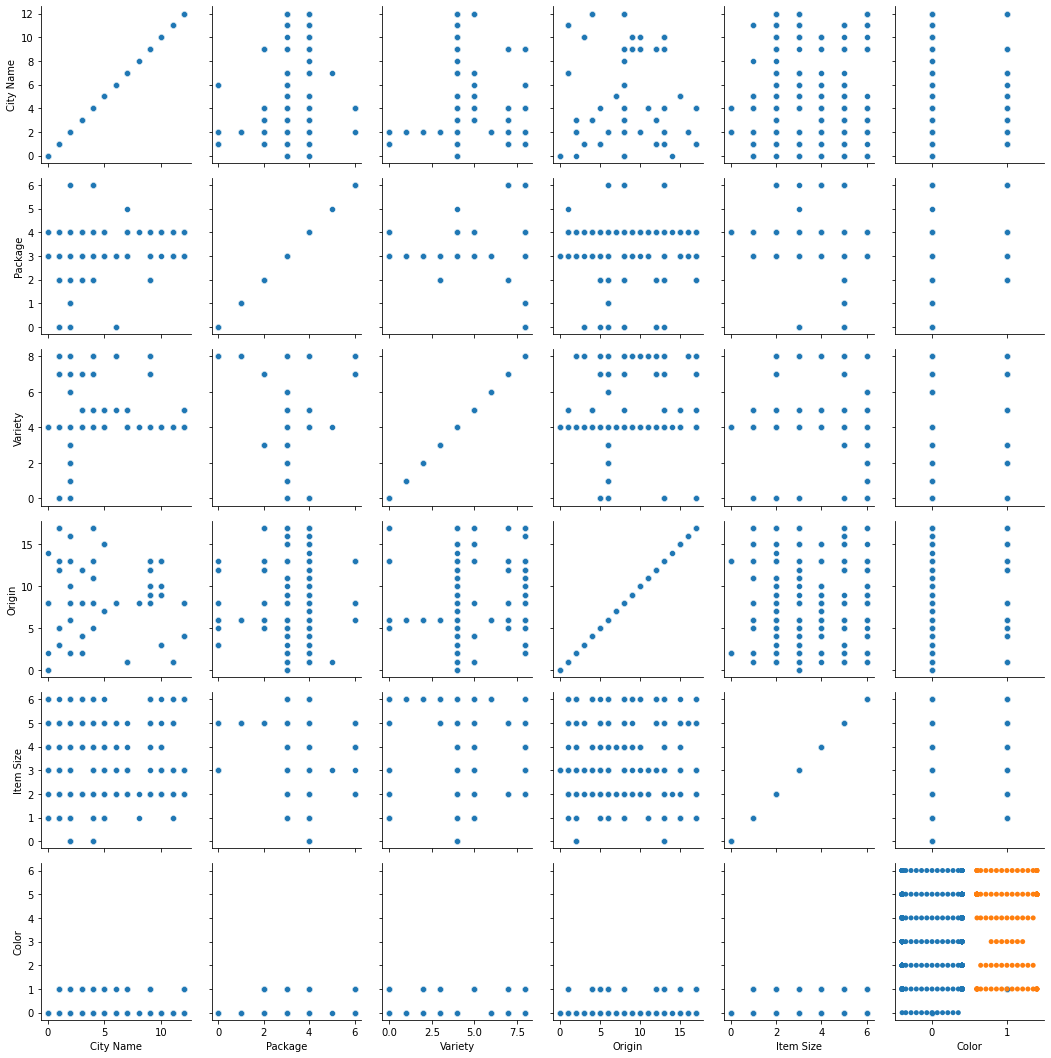

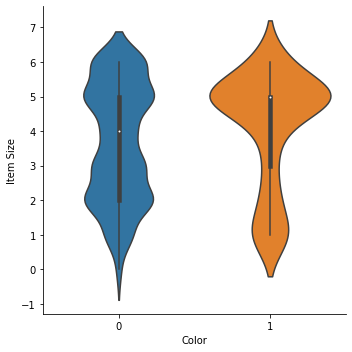

In [3]:
new_pumpkins2 = new_pumpkins.apply(LabelEncoder().fit_transform)

import seaborn as sns

grid = sns.PairGrid(new_pumpkins2)
grid.map(sns.scatterplot)
#???
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins2)

sns.catplot(x="Color", y="Item Size",
                kind="violin", data=new_pumpkins2)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

Selected_features = ['Origin','Item Size','Variety','City Name','Package']
#Selected_features = ['Package']

X = new_pumpkins2[Selected_features]
y = new_pumpkins2['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [5]:
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

/home/yp/anaconda3/envs/test2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yp/anaconda3/envs/test2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.6976998904709748


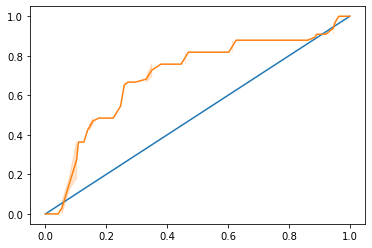

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)

auc = roc_auc_score(y_test, y_scores[:, 1])
print(auc)

In [8]:
# how to draw a P-R curve
# from sklearn.metrics import precision_recall_curve
# import matplotlib.pyplot as plot
#
# plot.figure(1)
# plot.title('PR curve')
# plot.xlabel('Recall')
# plot.ylabel('Precision')
#
# y_true = y_test
# y_scores = predictions
# precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
# plot.plot(precision, recall)
# plot.show()
